<h2>Task - 7 </h2>

# Register Id: SIRSS2292
# Name: Mahesh Deshmukh

Q1. Implement gradient descent (for simple linear regression) from scratch.

### Linear Regression
In statistics, linear regression is a linear approach to modelling the relationship between a dependent variable and one or more independent variables. Let X be the independent variable and Y be the dependent variable. then the linear regression is

In [ ]:
Y = m*X + c       -- (1)

Here, m is slope of the line.
      c is the y intercept.

### Loss Function
The loss is the error in our predicted value of m and c. Our goal is to minimize this error to obtain the most accurate value of m and c. We know the best loss function for linear regression is Mean Squared Error. therefore Mean Squared Error Equation is given by

In [ ]:
E = 1 / n * sum((actual_y - predicted_y)**2)  -- (2)

here n is number of obervation(items)

we know, the predicted_y = Y . so we can put value of Y into equation 2.

In [ ]:
E = 1 / n * sum((actual_y - (m*X + c))**2)   -- (3)

### The Gradient Descent Algorithm
Gradient descent is an iterative optimization algorithm to find the minimum of a function.

Let’s try applying gradient descent to m and c and approach it step by step:

    i) Initially let m = 0 and c = 0. Let L be our learning rate.
    ii) Calculate the partial derivative of the loss function with respect to m, and c.
    
    

In [ ]:
Dm = 1 / n * sum(2(actual_y - (m*X + c))(-X))
Dm = -2 / n * sum(X(actual_y - (m*X + c)))     -- (4)

Where, Dm is Derivative with respect to m

In [ ]:
Similarly
Dc = -2 / n * sum(actual_y - (m*X + c))         -- (5)

Where, Dc is Derivative with respect to c

    iii) Now we update the current value of m and c using the following equation:
        m = m - L * Dm
        c = c - L * Dc
    iv) We repeat this process until our loss function is a very small value or ideally 0 (which means 0 error or 100% accuracy).
        

In [ ]:
m = m - L * (-2 / n * sum(X(actual_y - (m*X + c))))
m = m + 2 / n * (sum(X(actual_y - (m*X + c))) * L)   -- (6)

In [ ]:
c = c + 2 / n * (sum((actual_y - (m*X + c))) * L)    -- (7)

### Implementing the Model
Now let’s convert everything above into code and see our model in action !

In [1]:
# import the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# load the data
df = pd.read_csv('Salary_Data.csv')

In [3]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
X = df.iloc[:,0]

In [5]:
Y = df.iloc[:,1]

In [6]:
X.head()

0    1.1
1    1.3
2    1.5
3    2.0
4    2.2
Name: YearsExperience, dtype: float64

In [7]:
Y.head()

0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: Salary, dtype: float64

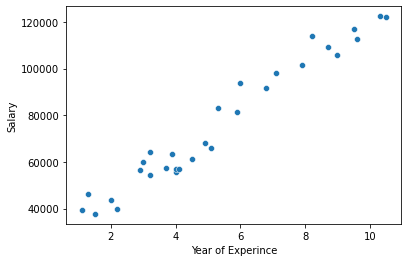

In [8]:
# plot 
sns.scatterplot(x=X,y=Y,data=df)
plt.xlabel('Year of Experince')
plt.ylabel('Salary')
plt.show()

In [13]:
# building model
c = 0
m = 0
n = len(X)
L = 0.0001  
epochs = 1000   
for i in range(epochs):    
    # from equation 1
    predict_y = m*X + c
    
    # from equation 4 qnd 5   
    Dm = -2 / n * sum(X*(Y - predict_y))
    Dc = -2 / n * sum(Y - predict_y) 

    # from equation 6 and 7
    m = m - L * Dm
    c = c - L * Dc

In [14]:
m

12836.600965885045

In [15]:
c

2915.2044856014018

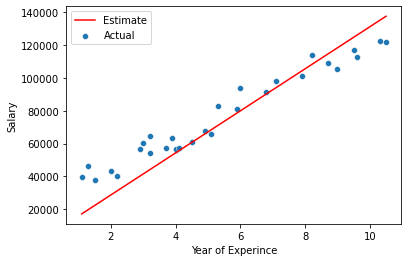

In [17]:
# fit the model
plt.plot(X,predict_y,'r')
sns.scatterplot(x=X,y=Y,data=df)
plt.xlabel('Year of Experince')
plt.ylabel('Salary')
plt.legend(['Estimate', 'Actual'])
plt.show()